# Experiments on Latent ODEs
**Project in Special Topics in Research - Year 1 Term 4**<br>
**Author: Maria Eloisa Ventura**

As motivated by my previous work on interpolating physiological signals or any sensor data, I chose to further study **Latent ODEs** (based on the work of Chen et al. (2018) and Rubanova et al. (2019)) and test the models perform when dealing with various types of data. 

Please note that Yulia Rubanova's [Latent ODE implementation](https://github.com/YuliaRubanova/latent_ode) was used in the experiments performed.

## Introduction 

Continuous-time models with a latent state defined at all times were introduced recently, and been applied to address the problem of missing data and irregular sampling. In 2018, Chen et al. introduced a generative latent function time-series model that represents each time series by a latent trajectory. **Each trajectory is determined from a local initial state, $z_{t_0}$, and a global set of latent dynamics shared across all time series.** Given observation times $t_0, t_1, \ldots , t_N$ and an initial state $z_{t_0}$, an ODE solver produces $z_{t_1}, \ldots, z_{t_N}$ which describe the latent state at each observation. They formally defined the generative model formally through the following sampling procedure: 
\begin{equation}
\mathbf{z}_{t_0} \sim p(\mathbf{z}_{t_0})
\end{equation}

\begin{equation}
\mathbf{z}_{t_1}, \mathbf{z}_{t_2}, \ldots, \mathbf{z}_{t_N} = \operatorname{ODESolve}(\mathbf{z}_{t_0}, f, \theta_f, t_0, t_1, \ldots , t_N)
\end{equation}

\begin{equation}
\operatorname{each}\ \ \mathbf{x}_{t_i} \sim p(\mathbf{x}|\mathbf{z}_{t_i}\theta_{\mathbf{x}})
\end{equation}

Function $f$, which they parametrized using a neural net, is a time-invariant function that takes the value $\mathbf{z}$ at the current time step and outputs the gradient: $\frac{\partial z}{\partial t}=f(\mathbf{z}(t),\theta_f)$. Due to the time-invariant property of $f$, the entire latent trajectory is uniquely defined given any latent state $\mathbf{z}(t)$. As a consequence, the latent trajectory can be used to make predictions forwards or backwards in time. The figure below illustrates the model proposed by Chen et al., where they have a variational autoencoder (RNN as the encoder and ODE Solve for the decoder) with sequence-valued observations. 
<img src="summary_notebook_files/figures/chen.png" width=600/>
<center><i>Computation graph of the latent ODE model by Chen et al. (2018)</i></center>

In 2019, Rubanova et al. introduced a modification of the latent ODE architecture by using ODE-RNN instead of RNN as the recognition network (as in figure below). The only difference between the ODE-RNN and the standard RNN is that they considered the pre-activations which evolve according to an ODE between observations.

<img src="summary_notebook_files/figures/rubanova.png" width=650/>
<center><i>Computation graph of the latent ODE model by Rubanova et al. (2019)</i></center>

Since Latent ODEs use Neural ODEs to represent latent dynamics, it is expected that its performance is also affected by Neural ODEs limitations. **One main factor that affects this is the smoothness of the solution**, and this is the scope of this notebook. We try to introduce various perturbations to the data such as introducing noise and forcing other discontinuities and investigate model performance by looking at signal reconstructions. 


## Experiment Overview 
### *Model Parameters and Training*
For all the experiments, we used the Seq2Seq Latent ODE model architecture introduced by Rubanova et al. where we have the ODE-RNN as the encoder and ODE solver as the decoder. We tested the model on a toy dataset which is composed of variations of periodic trajectories (see next section for details) with variable frequency and the same amplitude. Each dataset has 1000 trajectories and each has 100 timepoints. In some of the experiments, we performed subsampling of the toy data, and we attempt to resonctruct the full set of 100 points. For each set of trajectories, we trained two Latent ODE models having 5 and 10 latent dimensions, and all were trained for 50 epochs. For the rest of the notebook, we refer to LatentODE(5) and LatentODE(10) as the model with 5 latent states and 10 latent states, respectively. 


**NOTE:** As mentioned previously, we used Rubanova's implementation of the Latent ODE model, and we made modifications to the input signals to the model. Also, we performed all our experiments using a computer with Intel Xeon CPU running at 2.10GHz using 256 GB of RAM. 

### *Description of Experiments Performed*
The different experiments performed in this notebook focused on these types of periodic data: 
* Signals with noise
* Signals with discontinuities
* Signals with missing values at fixed timepoints

The scope of this notebook is limited to looking at the performance of the LatentODE(5) model and LatentODE(10) model on the signals mentioned above, and not on hyperparameter tuning of Rubanova's Latent ODE model. 

### *Expected Results*

For each experiment, we produce the following plots: 
* Reconstructions of 3 sample signals from the dataset ($\mathbf{x}(t)$)
* Latent trajectories ($\mathbf{z}(t)$)
* Visualization of the vector field
* Sample trajectories from the data space

The information above is presented in the following manner: the signal reconstructions are shown in the top row, while we have the latent trajectories, vector field and sample trajectories from the data are shown in the bottom row. ALL the results in this notebook are arranged in the same way. 



## Experiment 1: Signals with Noise

#### Results

Before introducing noise, we consider the result for modeling a simple sinusoid without noise. In this ideal case where our input to the model are smooth periodic signals, we visualize the results for epoch 1 to 50. 

<img src="summary_notebook_files/plots/run_models_97172.gif" width="550" align="center">
<center><i>Sample trajectories for smooth signals from Latent ODE model with 5 latent dimensions</i></center>
<br>
<img src="summary_notebook_files/plots/run_models_34596.gif" width="550" align="center">
<center><i>Sample trajectories for smooth signals from Latent ODE model with 10 latent dimensions</i></center>

> **Observations**
> * From the reconstructions above, we see that the by the end of 50 epochs, the both models (LatentODE(5) and LatentODE(10)) were able to accurately capture the periodicity of the input signals. However, in terms of the amplitude of the reconstructed signal, we see that both models were struggling to reconstruct the full amplitude of the Sample 1 (plot in top row, middle column), which has higher frequency compared to Sample 0 and 2. 
> * The results for the LatentODE(10) model shows that the model is able to capture the variations in the signal amplitude or the periodicity of the signals in earlier epochs compared to the LatentODE(5) model. 
> * Unlike the LatentODE(10) model, the LatentODE(5) model was not able to accurately capture that the sample signals start at value of zero at $t=0$. 
> * The LatentODE(10) model reconstructions had smoother peaks/valleys, closer to the form of the original signal, compared to LatentODE(5) reconstructions which had sharper peaks/valleys. 

Now, we try to introduce varying levels of noise to the continuous periodic signal (see [Experiment 1 - Adding Noise Notebook](Experiment%201%20-%20Adding%20Noise.ipynb) for the code used in model training). The results from the experiments at the end of 50 epochs are summarized below. The first column describes the noise level introduced to the signal (0, 0.25 and 0.5), while the second and third columns outlines the model results for 5 latent dimensions and 10 latent dimensions, respectively. 

<center><b> Results for interpolating the noisy signals</b><center/>

|Noise level|latent dim = 5|latent dim = 10|
|-|-|-|
|0|<img src="summary_notebook_files/plots/run_models_97172_050.png" width=600/>|<img src="summary_notebook_files/plots/run_models_34596_050.png" width=600/>|
|0.25|<img src="summary_notebook_files/plots/run_models_37025_050.png" width=600/>|<img src="summary_notebook_files/plots/run_models_60733_050.png" width=600/>|
|0.5|<img src="summary_notebook_files/plots/run_models_89782_050.png" width=600/>|<img src="summary_notebook_files/plots/run_models_29360_050.png" width=600/>|

> **Observations**
> * Despite the presence of noise, reconstructions from both LatentODE(5) and LatentODE(10) models are still smooth. 
> * For both LatentODE(5) and LatentODE(10) models, we see that the introduction of higher level of noise resulted to poorer quality of reconstruction. However, reconstructions from the LatentODE(10) model still followed the periodicity of the signal. 
> * The addition of noise heavily affected the amplitude of the reconstructed signal. At 0.25 noise level, we see that both models were able to capture similar frequency as the original signal but the amplitude of the reconstructions were much lower. 
> * At 0.5 noise level, the LatentODE(5) model produced reconstructions with lower frequency but the those reconstructions from the LatentODE(10) are still similar with the original. 
> * The model with lower latent dimension seems to perform more poorly on the boundaries compared to the model with more latent dimensions. For all noise levels considered (0, 0.25, 0.5), the LatentODE(5) model was not able to accurately capture that the sample signals start at value of zero at $t=0$. On the other hand, the LatentODE(10) model was no longer able to capture that the input signal starts from 0 only at noise level of 0.5.


#### Discussion

When we talk about physiological signals (or any other sensor data), we usually deal with noise and discontinuities in the data which could come from multiple sources. In some cases, we want to capture the underlying signal without the unwanted noise -- this could mean eliminating the randomness in the dataset and uncovering the smooth signal as the objective. When we expect a smooth input signal but there's noise present, the Latent ODE model can be used to reconstruct the signal. From the experiment above (Experiment 1), we found that the model with more latent dimensions (LatentODE(10)) was able to capture the dynamics of the noisy signal better. Also, regardless of the noise level (0, 0.25 and 0.5), we saw that both models struggled to obtain the correct amplitudes for the higher frequency signals. Given the same signal length (in our case, fixed at 100 data points), the peaks and valleys of higher frequency signals are sharper compared to lower frequency signals. And since latent ODEs are able to model the dynamics of smoother signals better, the decrease in reconstruction quality for higher frequency signals is expected. 


## Experiment 2: Signals with Discontinuities

### *Version 1*

In the first variation of signal, we introduced the a jump discontinuity as shown below: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-hcsrnzcg because the default path (/home/mventura/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


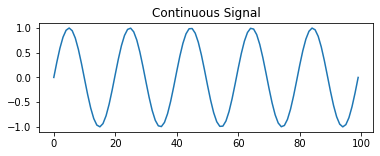

In [2]:
sample_periodic_trajectory = np.sin(2*np.pi*np.linspace(0, 1, 100)*5)
plt.figure(figsize=[6, 2])
plt.title('Continuous Signal')
plt.plot(sample_periodic_trajectory)
plt.show()

In [3]:
def add_jump_discontinuity(traj_continuous): 
    shift = np.random.randint(
        int(len(traj_continuous)/50),                                       
        int(len(traj_continuous)/20), 
        np.random.randint(1, 5))
    disc_index = np.random.randint(
        max(shift),
        len(traj_continuous)-max(shift),
        size=len(shift))
    traj_discont = traj_continuous
    for i, s in zip(disc_index, shift):
        traj_discont[i:] = traj_discont[i-s:len(traj_discont)-s] 
    return traj_discont   

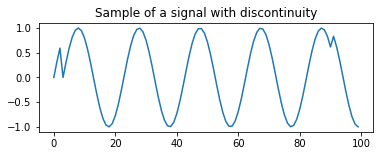

In [4]:
plt.figure(figsize=[6, 2])
plt.title('Sample of a signal with discontinuity')
plt.plot(add_jump_discontinuity(sample_periodic_trajectory))
plt.show()

#### Results

We generated different sets of 1000 signals like the ones plotted above and used them as input to our LatentODE(5) and Latent ODE(10) models (see [Experiment 2 - Adding Discontinuity 1 Notebook](Experiment%202%20-%20Adding%20Discontinuity%201.ipynb) for the code used in model training). In addition to reconstructing the complete signal with discontinuity, we also try to reconstruct a version of the signal with gaps (i.e., 50% of signal is missing). 

The results are summarized below. The first column describes the type of input signal (with discontinuity) we are trying to reconstruct: (1) a complete signal (0% missing) and (2) a signal with missing data (50% missing),  while the second and third columns outlines the model results for 5 latent dimensions and 10 latent dimensions, respectively. 

<center><b> Results for interpolating periodic signals with discontinuity (Version 1)</b><center/>

|Signal type|latent dim = 5|latent dim = 10|
|-|-|-|
|Signal with discontinuity <br>(<b>0% missing</b>, <br>0 noise)|<img src="summary_notebook_files/plots/run_models_41559_050.png" width=600/>|<img src="summary_notebook_files/plots/run_models_74924_050.png" width=600/>|
|Signal with discontinuity <br>(<b>50% missing</b>, <br>0 noise)|<img src="summary_notebook_files/plots/run_models_62661_050.png" width=600/>|<img src="summary_notebook_files/plots/run_models_44991_050.png" width=600/>|

> **Observations**
> * Despite the presence of discontinuity, reconstructions from both LatentODE(5) and LatentODE(10) models are still smooth and periodic. 
> * In Sample 0, we can see that the discontinuity seems like it produced a spurious peak that's lower in frequency (i.e., last peak looks wider than the first two), and this "change" in frequency in the signal itself was not reconstructed properly by both models. 
> * Even though the type of discontinuity introduced did not affect the maximum and minimum value of the input signals, the reconstructions seem to have peaks having different amplitudes as observed in all Sample 0, 1 and 2 for the case when the input signals are complete (0% missing). 
> * In the absence of some data points (50% missing), we can see from the result of both models that they were unable to recover the min value of 0 and max value of 2 for some of the peaks (e.g., see 2nd peak in Sample 2). 
> Comparing the output reconstruction for signals with 0% missing vs 50% missing, we find that the alignment of peaks were better for the case when the input signals were missing (e.g., see 3rd peak in Sample 1). 

### *Version 2*

In the second variation of jump discontinuity, we add a scaled step function to a portion of the periodic signal. We can imagine that this type of discontinuity can happen when the sensor that collects the signal is not properly placed/installed. For example, consider a photoplethysmogram (PPG) present in smart watches. It is a sensor that detects volumetric changes in the blood, which is the basis for the calculation of heart rate and respiration rate. When the smart watch gets dislodged, we may observe a DC bias in the collected PPG signal. 

For our experiment, we generate the discontinuity as follows. 

In [5]:
def add_step_disconitnuity(traj_continuous, amp): 
    shift = np.random.randint(
        int(len(traj_continuous)/5),                                       
        int(len(traj_continuous)/2), 
        np.random.randint(1, 3))
    disc_index = np.random.randint(
        len(traj_continuous)-max(shift),
        size=len(shift))
    traj_discont = traj_continuous
    for i, s in zip(disc_index, shift):
        traj_discont[i:i+s] = traj_discont[i:i+s]+amp*0.75
    return traj_discont   

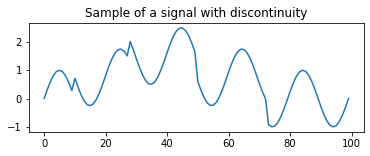

In [6]:
sample_periodic_trajectory = np.sin(2*np.pi*np.linspace(0, 1, 100)*5)
plt.figure(figsize=[6, 2])
plt.title('Sample of a signal with discontinuity')
plt.plot(add_step_disconitnuity(sample_periodic_trajectory, 1))
plt.show()

#### Results

We again generated different sets of 1000 signals like the ones plotted above and used them as input to our LatentODE(5) and Latent ODE(10) models (see [Experiment 2 - Adding Discontinuity 2 Notebook](Experiment%202%20-%20Adding%20Discontinuity%202.ipynb) for the code used in model training). As in the previous section, we also try to reconstruct a version of the signal with gaps (i.e., 50% of signal is missing). 

The results are summarized below. The first column describes the type of input signal (with discontinuity) we are trying to reconstruct: (1) a complete signal (0% missing) and (2) a signal with missing data (50% missing),  while the second and third columns outlines the model results for 5 latent dimensions and 10 latent dimensions, respectively. 

<center><b> Results for interpolating periodic signals with discontinuity (Version 2)</b><center/>

|Signal type|latent dim = 5|latent dim = 10|
|-|-|-|
|Signal with discontinuity <br>(<b>0% missing</b>, <br>0 noise)|<img src="summary_notebook_files/plots/run_models_5455_050.png" width=600/>|<img src="summary_notebook_files/plots/run_models_8700_050.png" width=600/>|
|Signal with discontinuity <br>(<b>50% missing</b>, <br>0 noise)|<img src="summary_notebook_files/plots/run_models_74547_050.png" width=600/>|<img src="summary_notebook_files/plots/run_models_49974_050.png" width=600/>|

> **Observations**
> * Unlike Version 1 where the type of discontinuity did not affect the observed min and max values of the signal, the addition of the step functio/DC bias to a portion of the input signal led to reconstructions with poorer quality. 
> * Although some parts of the input signal have sharp peaks due to the discontinuity, results from both models were still smooth. 
> * For LatentODE(5), we see that the frequency of the reconstructed signals are of lower frequency compared to the original signal for both 0% and 50% missing values. However, this was not the case for LatentODE(10) which was still able to capture similar frequency (same number of peaks in original and reconstructed signal). 
> * For Sample 0, the 2nd and 3rd peaks from the original signal were the parts that were "raised" due to the added step function. Interestingly, it seems that LatentODE(5) treated these as a single peak. 

#### Discussion 
However, there could also be cases where we want to model the discontinuities present in the data as they can provide additional information about the system being described (e.g., person wearing the device), or we simply have to model signals with inherent discontinuities. From our results above, we can separate the effects seen in two ways: (1) adding a discontinuity which led to an apparent change in frequency for some parts of the data (e.g., some peaks becoming wider than others), and (2) adding a discontinuity which led to change in amplitude of some parts of the signal. In the first one, we saw that the LatentODE models struggled to capture this "change in frequency" within the signal as the reconstructions seems like they had constant frequency all for all time points. This implies the inability of the model accommodate or learn changes in dynamics within a trajectory. In second case where we forced some parts of the signal to have higher value, we also seemed to have also introduced changes in frequency in the system (see Experiment 2 V2 for example). Again, these were not captured well by both LatentODE(5) and LatentODE(10) models. 


## Experiment 3: Signals with missing values at fixed timepoints

In this set of experiments, we look at how the models perform when the discontinuities/missing values are not introduced randomly inthe signal. Here, we assume that there are specific time points where no data was collected. For example, physiological signals from smart watches could be missing for a few hours every night when the person chooses not to wear the device during sleep. Here, we try to remove missing data from fixed time points which would represent the scenario mentioned. The process of generating the signal is shown below. 

In [7]:
def add_missing_values(traj_continuous): 
    random_missing_pct = int(len(traj_continuous)/2)
    n_chunks = 3
    min_size_gap = int(random_missing_pct/n_chunks)
    missing_val_len = ([int(min_size_gap)]*(n_chunks-1) 
                        + [min_size_gap+random_missing_pct%n_chunks])
    traj_discont = traj_continuous
    for c in range(n_chunks):
        gap_start = int((c+0.5) * int(len(traj_continuous)/(n_chunks)))
        traj_discont[gap_start:gap_start+missing_val_len[c]] = 0
    return traj_discont  

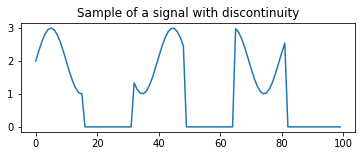

In [8]:
sample_periodic_trajectory = np.sin(2*np.pi*np.linspace(0, 1, 100)*5)+2
plt.figure(figsize=[6, 2])
plt.title('Sample of a signal with discontinuity')
plt.plot(add_missing_values(sample_periodic_trajectory))
plt.show()

#### Results

We again generated different sets of 1000 signals like the ones plotted above. The results are summarized below. 

<center><b>Results for interpolating the signals with missing data at fixed timepoints for the Latent ODE model with 10 latent dimensions</b><center/>
    
|latent dim = 5|latent dim = 10|
|-|-|
|<img src="summary_notebook_files/plots/run_models_26828_050_expt3_latent5.png" width=600/>|<img src="summary_notebook_files/plots/run_models_55455_050_expt3_latent10.png" width=600/>|
    

> **Observations**
> * For LatentODE(5), we see that the frequency of the reconstructed signals are of lower frequency compared to the original signal. The reconstructed signal are smooth but they are almost aperiodic. No peaks were observed. 
> * For LatentODE(10), we still have smooth reconstructions that are similar in frequency with the original. However, the amplitude of the reconstructions are much smaller than the original. 
> * Comparing the latent space, we can see that the trajectories from the LatentODE(5) model are also of lower frequency compared to those from the LatentODE(10). 

#### Discussion 
In the last experiment, we found that by simply increasing the latent dimension, the Latent ODE model was able to capture the periodicity of the original signal even in the absence of data points at regular intervals. In this example where we considered a signal sampled from a smooth sinusoid, we were able to capture the periodicity but not the correct amplitudes, which could be a huge limitation when we're going to deal with more complex signals such as those that contain more than one frequency component. 

## Summary

Overall, we found that the Latent ODE model becomes more robust to noise and other perturbations when the number of latent dimensions is increased. From the various experiments, we fed various signals to the models and we found that parts of the signal that were not smooth were not properly reconstructed, and changes in dynamics (e.g., some parts of signal have higher frequency than others) within the signal were not acccurately captured by the latent space trajectories of the LatentODE model. 

## Other Experiments
* **Investigating reconstruction quality for various frequencies.** The limitation found regarding the poor reconstruction quality for high frequency signals can be further explored and its relationship with latent dimension. If we can imagine the number of latent dimensions being related the representation power of Latent ODEs, we can check whether adding more dimensions can improve the reconstructions. 
* **More training epochs for signals with higher noise levels.** Since the final results presented here were only from 50 epochs, we want to explore whether training the LatentODE(5) for more epochs could allow the model to obtain the original signal better since we could get more periodic latent space trajectories. 
* **Extending the model to multivariate time series.** It would be interesting to see whether the results that we found here could also be observed when we consider multivariate time series (even with a toy dataset), especially when the characteristics of the component signal in the multivariate time series vary. 
* **Exploring the representation of latent space trajectories for real multivariate datasets.** Representing multiple signals having varied characteristics (e.g., range of values, frequencies, % of missing values) modeled using LatentODE in a multivariate setting would be interesting to explore. In terms of reconstruction, we expect the quality will vary across the component signals but it would be useful to explore effective the representations are when we apply the model in a classification problem. 

## References

1. Chen, R. T. Q., Rubanova, Y., Bettencourt, J., &amp; Duvenaud, D. (2019, December 14). Neural ordinary differential equations. arXiv.org. Retrieved December 2021, from https://arxiv.org/abs/1806.07366 
1. Rubanova, Y., Chen, R. T. Q., &amp; Duvenaud, D. (2019, July 8). Latent odes for irregularly-sampled time series. arXiv.org. Retrieved December 2021, from https://arxiv.org/abs/1907.03907 
1. Rubanova, Y., (n.d.). Yuliarubanova/latent_ode: Code for "latent odes for irregularly-sampled time series" paper. GitHub. Retrieved December 17, 2021, from https://github.com/YuliaRubanova/latent_ode 